In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from datetime import datetime
from dateutil import tz
import statsmodels.api as sm
import seaborn as sns

Data Processing

In [3]:
raw = pd.read_csv("all_data_hourly.csv")
raw

,name,slottime_GMT,slottype,slotavg,pointTitle
0,Campus.CW.TONS,5/1/21 4:00,H,2451.879750,Total Chilled Water
1,Campus.Elec.Demand_MW,5/1/21 4:00,H,21.180990,Total Campus Electric Demand
2,Campus.STM.Flow,5/1/21 4:00,H,147.684086,Total Steam Flow
3,CentralEnergyPlant.CW.ProcessCooler3inch.FP/TONS,5/1/21 4:00,H,15.075800,Process Cooler 3 inch Chilled Water
4,CentralEnergyPlant.CW.SampleCooler.FP/TONS,5/1/21 4:00,H,6.732450,Sample Cooler Chilled Water
...,...,...,...,...,...
130690,CentralEnergyPlant.CW.ProcessCooler3inch.FP/TONS,5/2/23 3:00,H,30.334750,Process Cooler 3 inch Chilled Water
130691,CentralEnergyPlant.CW.SampleCooler.FP/TONS,5/2/23 3:00,H,3.059270,Sample Cooler Chilled Water
130692,CentralEnergyPlant.GTG1-2.PROCESS.CW.FP/TONS,5/2/23 3:00,H,184.149750,GTG 1 and 2 Process Chilled Water
130693,CentralEnergyPlant.GTG1-2.TurbineIntakeAir.CW....,5/2/23 3:00,H,0.050382,GTG 1 and 2 Turbine Intake Air Chilled Water


In [4]:
raw["slottime_GMT"] = raw["slottime_GMT"].apply(lambda x: datetime.strptime(x, "%m/%d/%y %H:%M").replace(tzinfo=tz.tzutc()).astimezone(tz.tzlocal()))
raw

,name,slottime_GMT,slottype,slotavg,pointTitle
0,Campus.CW.TONS,2021-05-01 04:00:00+00:00,H,2451.879750,Total Chilled Water
1,Campus.Elec.Demand_MW,2021-05-01 04:00:00+00:00,H,21.180990,Total Campus Electric Demand
2,Campus.STM.Flow,2021-05-01 04:00:00+00:00,H,147.684086,Total Steam Flow
3,CentralEnergyPlant.CW.ProcessCooler3inch.FP/TONS,2021-05-01 04:00:00+00:00,H,15.075800,Process Cooler 3 inch Chilled Water
4,CentralEnergyPlant.CW.SampleCooler.FP/TONS,2021-05-01 04:00:00+00:00,H,6.732450,Sample Cooler Chilled Water
...,...,...,...,...,...
130690,CentralEnergyPlant.CW.ProcessCooler3inch.FP/TONS,2023-05-02 03:00:00+00:00,H,30.334750,Process Cooler 3 inch Chilled Water
130691,CentralEnergyPlant.CW.SampleCooler.FP/TONS,2023-05-02 03:00:00+00:00,H,3.059270,Sample Cooler Chilled Water
130692,CentralEnergyPlant.GTG1-2.PROCESS.CW.FP/TONS,2023-05-02 03:00:00+00:00,H,184.149750,GTG 1 and 2 Process Chilled Water
130693,CentralEnergyPlant.GTG1-2.TurbineIntakeAir.CW....,2023-05-02 03:00:00+00:00,H,0.050382,GTG 1 and 2 Turbine Intake Air Chilled Water


In [5]:
weather = pd.read_csv("weather_hourly.csv")
weather

,time,temperature_2m (°F),relativehumidity_2m (%),dewpoint_2m (°F),apparent_temperature (°F),pressure_msl (hPa),surface_pressure (hPa),precipitation (inch),rain (inch),snowfall (inch),...,cloudcover (%),cloudcover_low (%),cloudcover_mid (%),cloudcover_high (%),shortwave_radiation (W/m²),direct_radiation (W/m²),diffuse_radiation (W/m²),direct_normal_irradiance (W/m²),windspeed_10m (mp/h),windspeed_100m (mp/h)
0,2021-05-01T00:00,42.0,68,32.2,31.1,1008.0,973.4,0.000,0.000,0.000,...,77,50,53,1,35,16,19,133.5,16.8,27.8
1,2021-05-01T01:00,40.4,71,31.6,29.5,1009.3,974.5,0.004,0.004,0.000,...,100,63,64,17,0,0,0,0.0,16.5,27.3
2,2021-05-01T02:00,39.3,75,31.9,28.6,1010.2,975.3,0.008,0.008,0.000,...,100,61,97,90,0,0,0,0.0,16.2,26.9
3,2021-05-01T03:00,38.1,77,31.6,28.1,1011.1,976.1,0.008,0.008,0.000,...,100,94,100,74,0,0,0,0.0,14.6,24.3
4,2021-05-01T04:00,37.4,77,30.9,27.8,1011.7,976.6,0.008,0.004,0.028,...,100,99,98,50,0,0,0,0.0,13.2,22.9
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17539,2023-05-01T19:00,53.2,60,39.7,45.1,989.4,956.2,0.016,0.016,0.000,...,56,32,18,54,522,257,265,314.4,13.4,20.5
17540,2023-05-01T20:00,49.9,63,37.8,42.0,989.7,956.2,0.024,0.024,0.000,...,44,9,31,57,496,264,232,326.5,12.1,18.2
17541,2023-05-01T21:00,49.3,68,39.2,42.1,990.4,956.9,0.008,0.008,0.000,...,44,18,25,41,448,263,185,387.8,11.0,16.8
17542,2023-05-01T22:00,50.2,63,37.9,44.3,991.0,957.5,0.004,0.004,0.000,...,81,24,66,67,357,237,120,484.1,7.2,12.0


In [6]:
weather["time"] = weather["time"].apply(lambda x: datetime.strptime(x, "%Y-%m-%dT%H:%M").replace(tzinfo=tz.tzutc()).astimezone(tz.tzlocal()))
weather = weather.set_index("time")
weather

,temperature_2m (°F),relativehumidity_2m (%),dewpoint_2m (°F),apparent_temperature (°F),pressure_msl (hPa),surface_pressure (hPa),precipitation (inch),rain (inch),snowfall (inch),weathercode (wmo code),cloudcover (%),cloudcover_low (%),cloudcover_mid (%),cloudcover_high (%),shortwave_radiation (W/m²),direct_radiation (W/m²),diffuse_radiation (W/m²),direct_normal_irradiance (W/m²),windspeed_10m (mp/h),windspeed_100m (mp/h)
time,,,,,,,,,,,,,,,,,,,,
2021-05-01 00:00:00+00:00,42.0,68,32.2,31.1,1008.0,973.4,0.000,0.000,0.000,2,77,50,53,1,35,16,19,133.5,16.8,27.8
2021-05-01 01:00:00+00:00,40.4,71,31.6,29.5,1009.3,974.5,0.004,0.004,0.000,51,100,63,64,17,0,0,0,0.0,16.5,27.3
2021-05-01 02:00:00+00:00,39.3,75,31.9,28.6,1010.2,975.3,0.008,0.008,0.000,51,100,61,97,90,0,0,0,0.0,16.2,26.9
2021-05-01 03:00:00+00:00,38.1,77,31.6,28.1,1011.1,976.1,0.008,0.008,0.000,51,100,94,100,74,0,0,0,0.0,14.6,24.3
2021-05-01 04:00:00+00:00,37.4,77,30.9,27.8,1011.7,976.6,0.008,0.004,0.028,71,100,99,98,50,0,0,0,0.0,13.2,22.9
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2023-05-01 19:00:00+00:00,53.2,60,39.7,45.1,989.4,956.2,0.016,0.016,0.000,51,56,32,18,54,522,257,265,314.4,13.4,20.5
2023-05-01 20:00:00+00:00,49.9,63,37.8,42.0,989.7,956.2,0.024,0.024,0.000,53,44,9,31,57,496,264,232,326.5,12.1,18.2
2023-05-01 21:00:00+00:00,49.3,68,39.2,42.1,990.4,956.9,0.008,0.008,0.000,51,44,18,25,41,448,263,185,387.8,11.0,16.8


In [7]:
chilled_water = raw[["slottime_GMT", "slotavg"]][raw["pointTitle"] == "Total Chilled Water"]
chilled_water.columns = ["time", "chilled_water"]
chilled_water = chilled_water.set_index("time")
display(chilled_water)

steam = raw[["slottime_GMT", "slotavg"]][raw["pointTitle"] == "Total Steam Flow"]
steam.columns = ["time", "steam"]
steam = steam.set_index("time")
display(steam)

electricity = raw[["slottime_GMT", "slotavg"]][raw["pointTitle"] == "Total Campus Electric Demand"]
electricity.columns = ["time", "electricity"]
electricity = electricity.set_index("time")
display(electricity)

,chilled_water
time,
2021-05-01 04:00:00+00:00,2451.87975
2021-05-01 05:00:00+00:00,2385.74125
2021-05-01 06:00:00+00:00,2314.83125
2021-05-01 07:00:00+00:00,2319.18375
2021-05-01 08:00:00+00:00,2361.69675
...,...
2023-05-01 23:00:00+00:00,2980.17150
2023-05-02 00:00:00+00:00,2830.65875
2023-05-02 01:00:00+00:00,2796.19950


,steam
time,
2021-05-01 04:00:00+00:00,147.684086
2021-05-01 05:00:00+00:00,147.614200
2021-05-01 06:00:00+00:00,151.649156
2021-05-01 07:00:00+00:00,147.774962
2021-05-01 08:00:00+00:00,150.348843
...,...
2023-05-01 23:00:00+00:00,123.162225
2023-05-02 00:00:00+00:00,128.566650
2023-05-02 01:00:00+00:00,126.427325


,electricity
time,
2021-05-01 04:00:00+00:00,21.180990
2021-05-01 05:00:00+00:00,21.046370
2021-05-01 06:00:00+00:00,20.794573
2021-05-01 07:00:00+00:00,20.755208
2021-05-01 08:00:00+00:00,20.699110
...,...
2023-05-01 23:00:00+00:00,25.738350
2023-05-02 00:00:00+00:00,25.189815
2023-05-02 01:00:00+00:00,24.451785


In [8]:
df = weather.join([chilled_water], how="inner").reset_index()
df.dropna()

,time,temperature_2m (°F),relativehumidity_2m (%),dewpoint_2m (°F),apparent_temperature (°F),pressure_msl (hPa),surface_pressure (hPa),precipitation (inch),rain (inch),snowfall (inch),...,cloudcover_low (%),cloudcover_mid (%),cloudcover_high (%),shortwave_radiation (W/m²),direct_radiation (W/m²),diffuse_radiation (W/m²),direct_normal_irradiance (W/m²),windspeed_10m (mp/h),windspeed_100m (mp/h),chilled_water
0,2021-05-01 04:00:00+00:00,37.4,77,30.9,27.8,1011.7,976.6,0.008,0.004,0.028,...,99,98,50,0,0,0,0.0,13.2,22.9,2451.87975
1,2021-05-01 05:00:00+00:00,37.0,76,30.1,27.4,1012.5,977.4,0.004,0.000,0.028,...,92,99,8,0,0,0,0.0,13.0,25.2,2385.74125
2,2021-05-01 06:00:00+00:00,37.0,74,29.6,26.7,1013.3,978.2,0.000,0.000,0.000,...,99,99,0,0,0,0,0.0,14.6,25.6,2314.83125
3,2021-05-01 07:00:00+00:00,36.4,85,32.3,27.5,1014.0,978.8,0.000,0.000,0.000,...,95,87,0,0,0,0,0.0,12.2,20.8,2319.18375
4,2021-05-01 08:00:00+00:00,36.8,83,32.0,28.3,1014.9,979.7,0.000,0.000,0.000,...,94,76,0,0,0,0,0.0,10.9,19.5,2361.69675
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17406,2023-05-01 19:00:00+00:00,53.2,60,39.7,45.1,989.4,956.2,0.016,0.016,0.000,...,32,18,54,522,257,265,314.4,13.4,20.5,3289.04225
17407,2023-05-01 20:00:00+00:00,49.9,63,37.8,42.0,989.7,956.2,0.024,0.024,0.000,...,9,31,57,496,264,232,326.5,12.1,18.2,3060.91725
17408,2023-05-01 21:00:00+00:00,49.3,68,39.2,42.1,990.4,956.9,0.008,0.008,0.000,...,18,25,41,448,263,185,387.8,11.0,16.8,3036.43975
17409,2023-05-01 22:00:00+00:00,50.2,63,37.9,44.3,991.0,957.5,0.004,0.004,0.000,...,24,66,67,357,237,120,484.1,7.2,12.0,3170.22075


In [9]:
df['chilled_water'].mean()

6069.5603629888

In [10]:
from sklearn.model_selection import train_test_split
import statsmodels.api as sm

In [11]:
covariates = ['temperature_2m (°F)']
X = df[covariates]
Y = df['chilled_water']
X_train, X_test, Y_train, Y_test = train_test_split(X, Y)
X = sm.add_constant(X_train)
model = sm.OLS(Y_train, X).fit()
X1 = sm.add_constant(X_test)
yhat = model.predict(X1)
np.sum((yhat - Y_test)**2)

31433507713.79496

In [12]:
covariates = ['temperature_2m (°F)','relativehumidity_2m (%)', 'apparent_temperature (°F)']
X = df[covariates]
Y = df['chilled_water']
X_train, X_test, Y_train, Y_test = train_test_split(X, Y)
X = sm.add_constant(X_train)
model = sm.OLS(Y_train, X).fit()
X1 = sm.add_constant(X_test)
yhat = model.predict(X1)
np.sum((yhat - Y_test)**2)

21515923713.199516

In [13]:
covariates = ['temperature_2m (°F)','relativehumidity_2m (%)', 'apparent_temperature (°F)']
X = df[covariates]
Y = df['chilled_water']
X_train, X_test, Y_train, Y_test = train_test_split(X, Y)
X = sm.add_constant(X_train)
model = sm.OLS(Y_train, X).fit()
X1 = sm.add_constant(X_test)
yhat = model.predict(X1)
np.sum((yhat - Y_test)**2)

21995642297.119057

In [14]:
covariates = ['temperature_2m (°F)','relativehumidity_2m (%)', 'apparent_temperature (°F)', 'cloudcover_low (%)']
X = df[covariates]
Y = df['chilled_water']
X_train, X_test, Y_train, Y_test = train_test_split(X, Y)
X = sm.add_constant(X_train)
model = sm.OLS(Y_train, X).fit()
X1 = sm.add_constant(X_test)
yhat = model.predict(X1)
np.sum((yhat - Y_test)**2)

22375716452.365993

In [15]:
covariates = ['temperature_2m (°F)']
X = df[covariates]
X["temperature_2m^2 (°F)"] = np.power(df["temperature_2m (°F)"], 2)
Y = df['chilled_water']
X_train, X_test, Y_train, Y_test = train_test_split(X, Y)
X = sm.add_constant(X_train)
model = sm.OLS(Y_train, X).fit()
X1 = sm.add_constant(X_test)
yhat = model.predict(X1)
np.sum((yhat - Y_test)**2)

<ipython-input-15-8f445c22411e>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X["temperature_2m^2 (°F)"] = np.power(df["temperature_2m (°F)"], 2)


16557571054.919659

In [16]:
covariates = ['temperature_2m (°F)','relativehumidity_2m (%)', 'apparent_temperature (°F)', 'cloudcover_low (%)', "shortwave_radiation (W/m²)"]
X = df[covariates]
X["temperature_2m^2 (°F)"] = np.power(df["temperature_2m (°F)"], 2)
X["temperature_2m^2 (°F)"] = np.power(df["apparent_temperature (°F)"], 2)
Y = df['chilled_water']
X_train, X_test, Y_train, Y_test = train_test_split(X, Y)
X = sm.add_constant(X_train)
model = sm.OLS(Y_train, X).fit()
X1 = sm.add_constant(X_test)
yhat = model.predict(X1)
np.sum((yhat - Y_test)**2)

<ipython-input-16-5488aff00207>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X["temperature_2m^2 (°F)"] = np.power(df["temperature_2m (°F)"], 2)
<ipython-input-16-5488aff00207>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X["temperature_2m^2 (°F)"] = np.power(df["apparent_temperature (°F)"], 2)


10823863068.192163

In [17]:
covariates = ['temperature_2m (°F)','relativehumidity_2m (%)', 'cloudcover_low (%)', "shortwave_radiation (W/m²)"]
X = df[covariates]
X["temperature_2m^2 (°F)"] = np.power(df["temperature_2m (°F)"], 2)
Y = df['chilled_water']
X_train, X_test, Y_train, Y_test = train_test_split(X, Y,test_size=0.5, random_state=0)
X = sm.add_constant(X_train)
model = sm.OLS(Y_train, X).fit()
X1 = sm.add_constant(X_test)
yhat = model.predict(X1)
print(np.sum(np.abs((yhat - Y_test)**2)))
yhat1 = model.predict(X)
print(np.sum(np.abs((yhat1 - Y_train)**2)))

27974870578.522297
27557166630.254147


<ipython-input-17-07ce1541f336>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X["temperature_2m^2 (°F)"] = np.power(df["temperature_2m (°F)"], 2)


In [18]:
print(df['chilled_water'].mean())
print(df['chilled_water'].std())
df['chilled_water'].mean()*0.05
df['chilled_water'].mean()*0.25

6069.5603629888
4723.518943842609


1517.3900907472

In [19]:
(yhat - Y_test).reset_index(drop='true')[0]

-813.791004475233

In [20]:
total = len(Y_test)
X = (np.abs(yhat - Y_test)).reset_index(drop='true') 
X = X[X<300]
len(X)/total

0.16540317022742937

In [21]:
total = len(Y_test)
X = (np.abs(yhat - Y_test)).reset_index(drop='true') 
X = X[X<600]
len(X)/total

0.33080634045485874

In [22]:
total = len(Y_test)
X = (np.abs(yhat - Y_test)).reset_index(drop='true')
X = X[X<1517]
len(X)/total

0.6830921203767517

In [23]:
X = (np.abs(yhat - Y_test)).reset_index(drop='true') 
range = [300, 600, 900, 1200, 1500, 1800, 2100, 2400, 2700, 3000, 3300, 3600, 3900, 4200, 4500, 4800, 5100, 5400, 5700, 6000, 6300, 6600, 6900]
values = [len(X[X<x]) / total for x in range]
values

[0.16540317022742937,
 0.33080634045485874,
 0.46473696301401335,
 0.5816678152997933,
 0.6784975878704342,
 0.7590167700436481,
 0.8223064553181714,
 0.8681369170686882,
 0.9007580978635424,
 0.9247645302090512,
 0.9402710774178727,
 0.9533654950608775,
 0.9620951068228808,
 0.9686423156443832,
 0.9734665747760165,
 0.978175970594992,
 0.9828853664139674,
 0.9861015391683896,
 0.9878244888582587,
 0.9895474385481278,
 0.9916149781759706,
 0.992878474615208,
 0.9941419710544452]

Text(0, 0.5, 'Percent of Correct Predictions')

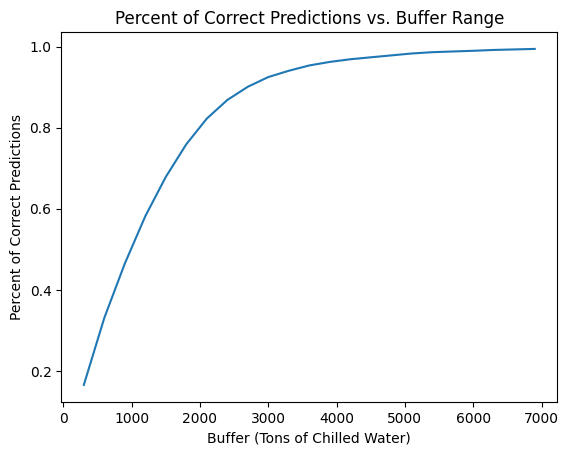

In [24]:
plt.plot(range, values)
plt.title('Percent of Correct Predictions vs. Buffer Range')
plt.xlabel('Buffer (Tons of Chilled Water)')
plt.ylabel('Percent of Correct Predictions')